# Plot models in P1D archive

Read all the measured P1D from a suite of simulations, and put them in an archive object

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from cup1d.archive import example_p1d_archive

### Specify suite of simulations to use and filename structure

In [2]:
# folder containing P1D measured in simulations
basedir='../sim_suites/Wimbledon19/'
# prefix_snap_suffix.json will be the filenames, with snap=number of snapshot
prefix='p1d'
suffix='Ns512_wM0.05'

In [3]:
# load archive 
archive=example_p1d_archive.ExampleArchiveP1D(basedir=basedir,prefix=prefix,suffix=suffix,verbose=True)

latin hyper-cube data {'param_space': {'heat_amp': {'ip': 0, 'min_val': 0.5, 'max_val': 1.5, 'latex': '$H_A$'}, 'heat_slo': {'ip': 1, 'min_val': -0.5, 'max_val': 0.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 2, 'min_val': 5.5, 'max_val': 15.0, 'latex': '$z_r$'}}, 'nsamples': 4, 'samples': {'0': [1.125, 0.125, 9.0625], '1': [0.875, -0.125, 11.4375], '2': [0.625, -0.375, 6.6875], '3': [1.375, 0.375, 13.8125]}}
simulation suite has 4 samples
0 sample has sim params = [1.125, 0.125, 9.0625]
simulation has 11 redshifts
1 sample has sim params = [0.875, -0.125, 11.4375]
simulation has 11 redshifts
2 sample has sim params = [0.625, -0.375, 6.6875]
simulation has 11 redshifts
3 sample has sim params = [1.375, 0.375, 13.8125]
simulation has 11 redshifts
Arxiv setup, containing 132 entries
ExampleArchiveP1D will call constructor of ArchiveP1D
Inside base class ArchiveP1D constructor
Number of data points stored in archive = 132


### Inspect simulation suite

In [4]:
# cube data has information about the Latin Hypercube, and the simulation parameters varied (here IGM only)
archive.cube_data

{'nsamples': 4,
 'param_space': {'heat_amp': {'ip': 0,
   'latex': '$H_A$',
   'max_val': 1.5,
   'min_val': 0.5},
  'heat_slo': {'ip': 1, 'latex': '$H_S$', 'max_val': 0.5, 'min_val': -0.5},
  'z_rei': {'ip': 2, 'latex': '$z_r$', 'max_val': 15.0, 'min_val': 5.5}},
 'samples': {'0': [1.125, 0.125, 9.0625],
  '1': [0.875, -0.125, 11.4375],
  '2': [0.625, -0.375, 6.6875],
  '3': [1.375, 0.375, 13.8125]}}

In [5]:
# each simulation has multiple snapshots, and each snapshot might have multiple post-processings
print('{} entries in the archive'.format(len(archive.data)))

132 entries in the archive


In [6]:
# print emulator parameters for one of the entries
archive.print_entry(5)

entry = 5, z = 4.5000, Delta2_p = 0.1940, n_p = -2.3026, alpha_p = -0.2150, f_p = 0.9920, mF = 0.1760, sigT_Mpc = 0.1046, gamma = 1.4959, kF_Mpc = 25.4943


### Linear density power spectra in the archive

This suite of simulations did not vary cosmology, so all values of the effective slope ($n_p$) are the same. 

However, different redshifts have different values of the linear amplidue ($\Delta_p^2$).

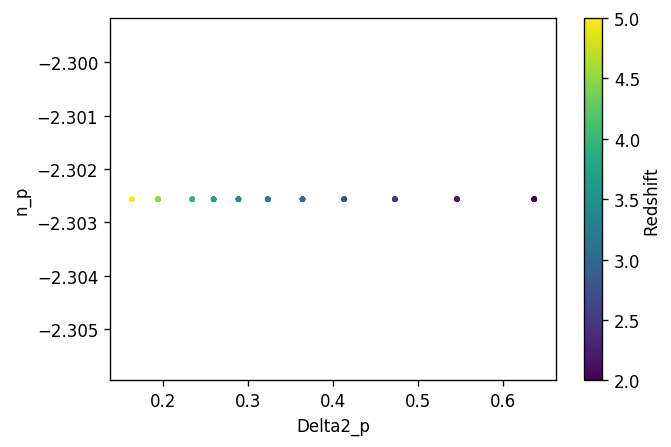

In [7]:
archive.plot_samples('Delta2_p','n_p',point_size=5)

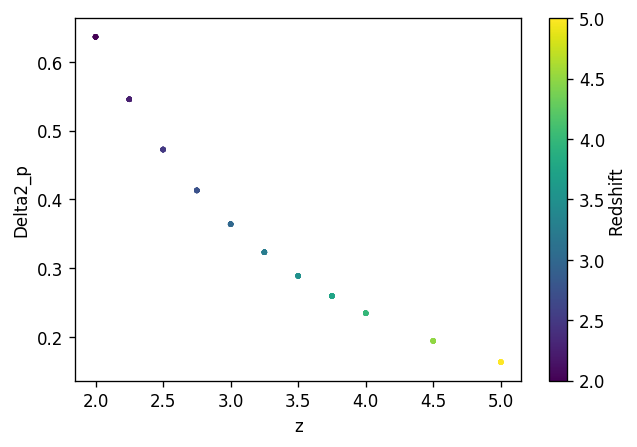

In [8]:
archive.plot_samples('z','Delta2_p',point_size=5)

### IGM parameters in the archive

The thermal/ionization history are different in different simulations, so we have more points for those parameters

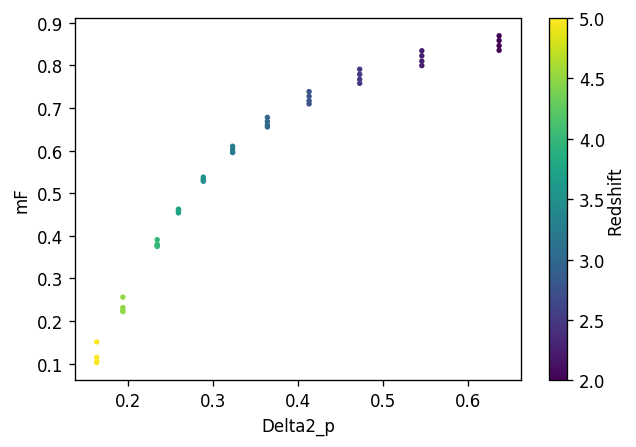

In [9]:
# mean transmitted flux fraction vs linear power amplitude
archive.plot_samples('Delta2_p','mF',tau_scalings=False,point_size=5)

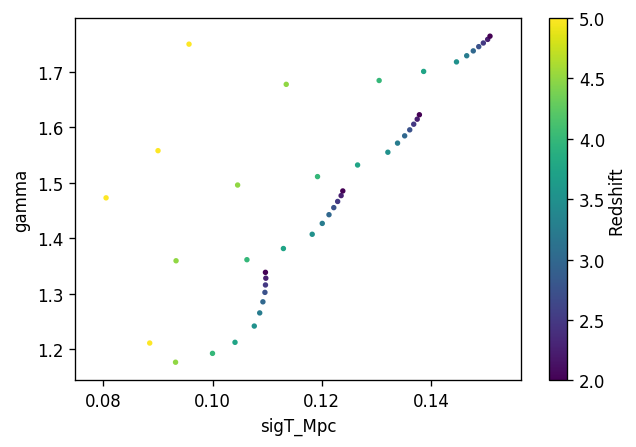

In [10]:
# thermal broadening (in Mpc) vs slope of temperature-density relation
archive.plot_samples('sigT_Mpc','gamma',tau_scalings=False,temp_scalings=False,point_size=5)

### Post-processing / rescalings

Simulations are expensive, but we can increase the number of models by post-processing the snapshots.

For instance, we can rescale the optical depth of the skewers(tau_scalings).

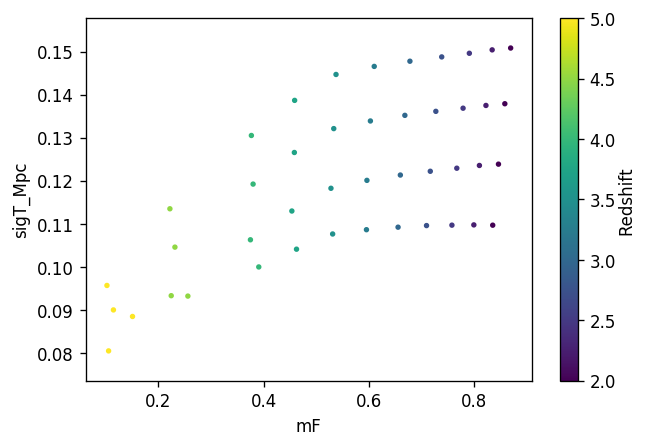

In [11]:
# no rescalings
archive.plot_samples('mF','sigT_Mpc',tau_scalings=False,point_size=5)

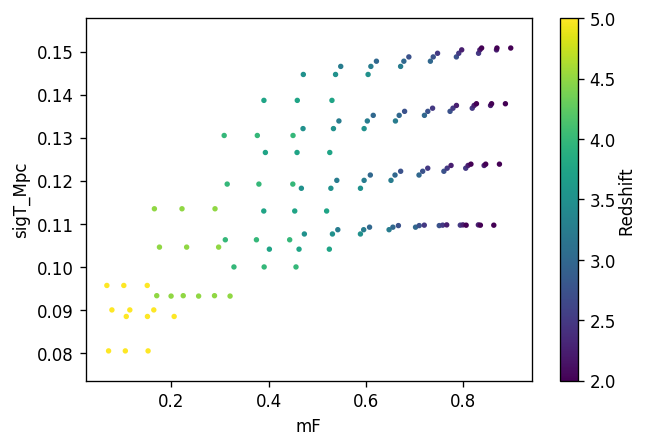

In [12]:
# add rescalings (3 per snapshot)
archive.plot_samples('mF','sigT_Mpc',tau_scalings=True,point_size=5)

In [13]:
plot_ylog=True
def plot_p1d_dependence(data,tag):
    N=len(data)
    print('N =',N)
    val=np.array([data[i][tag] for i in range(N)])
    imin=np.argmin(val)
    imax=np.argmax(val)
    min_val=val[imin]
    max_val=val[imax]
    for i in range(N):
        k_Mpc=data[i]['k_Mpc']
        p1d_Mpc=data[i]['p1d_Mpc']
        col = plt.cm.jet((val[i]-min_val)/(max_val-min_val))
        if i in [imin,imax]:
            label=tag+' = %f'%val[i]
        else:
            label=None
        if plot_ylog:
            plt.loglog(k_Mpc,k_Mpc*p1d_Mpc,color=col,label=label)            
        else:
            plt.semilogx(k_Mpc,k_Mpc*p1d_Mpc,color=col,label=label)
    plt.xlabel(r'$k_\parallel$ [1/Mpc]')
    plt.ylabel(r'$k_\parallel \quad P_{\delta}(k_\parallel)$')
    plt.legend()
    plt.title(r'$P_{\rm 1D}(k)$ as a function of '+tag)

N = 132


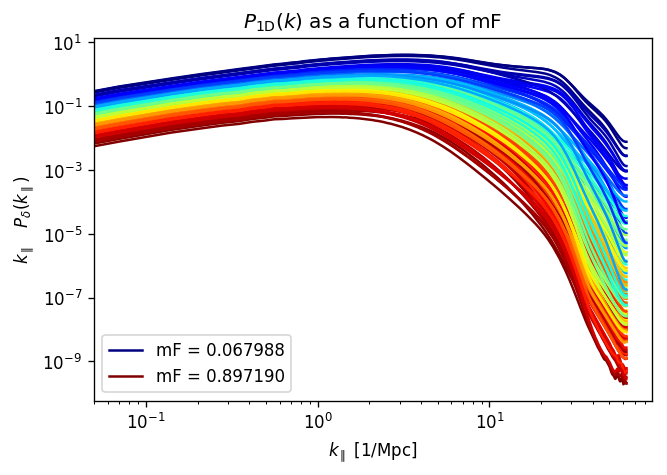

In [14]:
plot_p1d_dependence(archive.data,'mF')